# 循环神经网络
输出会被循环连接到RNN层中作为输入
rnn的输入为一个张量序列（timesteps,input_features）
每一个timesteps考虑当前状态的输入还有当前的状态（也就是上一个状态的输入）

使用keras层实现


In [1]:
from keras.layers import SimpleRNN


两种不同的模式：
一种返回时间步连续输出的完整序列，即形状为（batch_size,timesteps,output_features）
另一种是只返回每个输入序列的最终输出（batch_size，output_features）

In [3]:
from keras.models import Sequential
from keras.layers import Embedding ,SimpleRNN
model= Sequential()
model.add(Embedding(1000,32))
model.add(SimpleRNN(32))
model.summary()
#返回最终序列

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          32000     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 34,080
Trainable params: 34,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
# 多个循环层堆叠，返回完整的输出序列
model=Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32,return_sequences=True))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [5]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print("loading data...")
(input_train,y_train),(input_test,y_test)=imdb.load_data(num_words=max_features)

print(len(input_train),"train sequences")
print(len(input_test),"test sequences")

print('Pad sequences (samples x time)')
input_train  = sequence.pad_sequences(input_train,maxlen=maxlen)
input_test  = sequence.pad_sequences(input_test,maxlen=maxlen)


loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)


In [6]:
from keras.layers import Dense


model = Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=model.fit(input_train,y_train,
epochs=10,batch_size=128,validation_split=0.2)


Epoch 1/10
157/157 [==============================] - 49s 297ms/step - loss: 0.6300 - acc: 0.6338 - val_loss: 0.4997 - val_acc: 0.7782
Epoch 2/10
157/157 [==============================] - 48s 304ms/step - loss: 0.3992 - acc: 0.8335 - val_loss: 0.3934 - val_acc: 0.8282
Epoch 3/10
157/157 [==============================] - 48s 308ms/step - loss: 0.2905 - acc: 0.8845 - val_loss: 0.3749 - val_acc: 0.8522
Epoch 4/10
157/157 [==============================] - 47s 302ms/step - loss: 0.2134 - acc: 0.9186 - val_loss: 0.3774 - val_acc: 0.8496
Epoch 5/10
157/157 [==============================] - 45s 290ms/step - loss: 0.1502 - acc: 0.9471 - val_loss: 0.4532 - val_acc: 0.8036
Epoch 6/10
157/157 [==============================] - 46s 291ms/step - loss: 0.1009 - acc: 0.9653 - val_loss: 0.4318 - val_acc: 0.8398
Epoch 7/10
157/157 [==============================] - 46s 290ms/step - loss: 0.0668 - acc: 0.9793 - val_loss: 0.5033 - val_acc: 0.8238
Epoch 8/10
157/157 [==============================] - 4

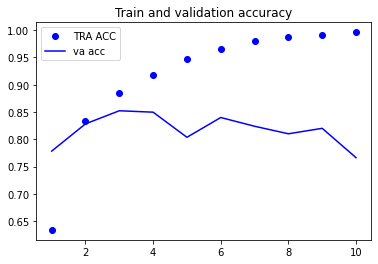

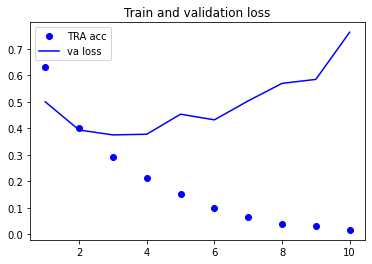

In [7]:
import matplotlib.pyplot as plt

acc= history.history['acc']
val_acc = history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='TRA ACC')
plt.plot(epochs,val_acc,'b',label='va acc')
plt.title('Train and validation accuracy')
plt.legend()
plt.savefig('Rnn_v1_acc.png')
plt.figure()

plt.plot(epochs,loss,'bo',label='TRA acc')
plt.plot(epochs,val_loss,'b',label='va loss')
plt.title('Train and validation loss')
plt.legend()

plt.savefig('Rnn_v1_loss.png')
plt.show()